In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [17]:
df = pd.read_csv("mon_fichier.csv") 

In [ ]:
#Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

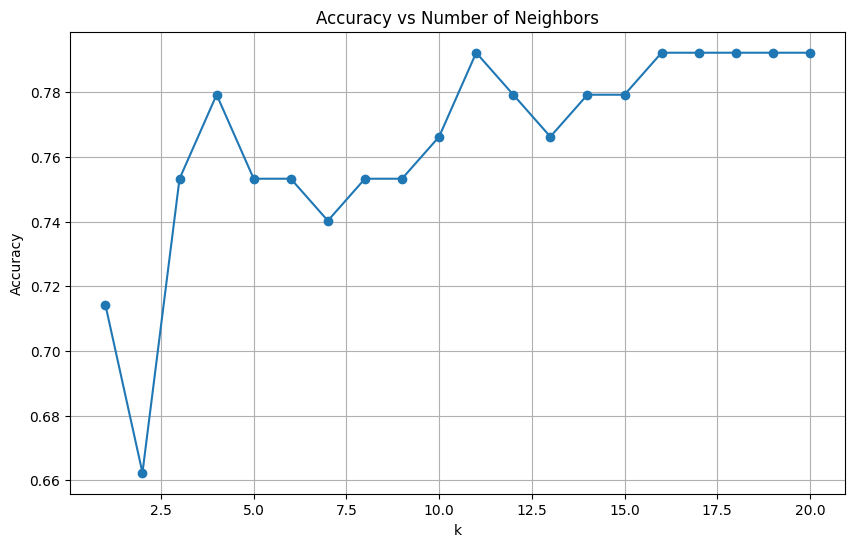

In [ ]:
#Split into training and test sets 
x = df.drop(columns=['Response'])
y = df['Response']
x_train, x_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)
#Find the best value of k
accuracies = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))
#Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(range(1,21), accuracies, marker='o')
plt.title("Accuracy vs Number of Neighbors")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [34]:
#Train final model with best k
best_k = accuracies.index(max(accuracies)) + 1
print(f"Best K found : {best_k}")

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(x_train, y_train)
y_pred_final = final_knn.predict(x_test)

Best K found : 11


In [ ]:
#Evaluate the model
acc = accuracy_score(y_test, y_pred_final)
cm = confusion_matrix(y_test, y_pred_final)
report = classification_report(y_test, y_pred_final)
print(f"\nAccuracy: {acc:.4f}")
print("\nConfusion Matrix :")
print(cm)
print("\nClassification Report :")
print(report)


Accuracy: 0.7922

Confusion Matrix :
[[ 3  6  1  0]
 [ 3 45  0  0]
 [ 0  3 13  0]
 [ 0  2  1  0]]

Classification Report :
              precision    recall  f1-score   support

           0       0.50      0.30      0.38        10
           1       0.80      0.94      0.87        48
           2       0.87      0.81      0.84        16
           3       0.00      0.00      0.00         3

    accuracy                           0.79        77
   macro avg       0.54      0.51      0.52        77
weighted avg       0.75      0.79      0.76        77



c:\Users\hami1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hami1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hami1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

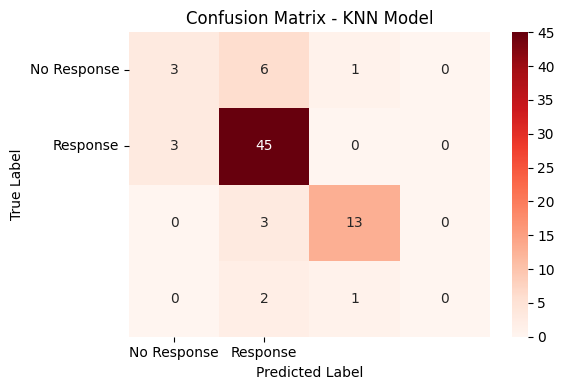

In [41]:
import seaborn as sns 

cm = confusion_matrix(y_test, y_pred_final)
labels = ['No Response', 'Response']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN Model')
plt.tight_layout()
plt.show()

